In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import tb

# Computing band structure initializing initializing parameters from the input file `input.yaml`

Many steps related to setting input parameters may be avoided using an input file. 

## 1. Input file example

Below is an example of yaml-formatted input file `input.yaml` for the bulk silicon stored in the directory `input_samples`.

In [2]:
cat ../input_samples/input.yaml

# Parameter file for the TB_project for Si

VERBOSITY:                   1

# --------------------------------------------------------

lattice_constant:           5.50
nn_distance:                2.7

xyz:
    num_atoms:               2
    title:                "Si2 cell"
    atoms:
        - Si1:       [0.0000000000,    0.0000000000,    0.0000000000]
        - Si2:       [1.3750000000,    1.3750000000,    1.3750000000]

# ---------------------------------------------------------

orbital_sets:
    Si:                'SiliconSP3D5S'
    H:                   'HydrogenS'

# ---------------------------------------------------------

primitive_cell:
    - [0, 0.5, 0.5]               # first vector
    - [0.5, 0, 0.5]               # second vector
    - [0.5, 0.5, 0]               # third vector

# Tight-binding empirical parameters taken from
# Jancu et al., Phys. Rev. B, 57, 6493 (1998) and
# Zheng et al., IEEE Trans. Electron Dev., 52, 1092 (2005))

#  On-site Si
PARAMS_ON_SITE_SI:
   

## 2. Parsing input file

First, the yaml-file has to be transformed to the python dictionary:

In [3]:
params = tb.yaml_parser("../input_samples/input.yaml")

Next, the resulted dictionary has to be passed into the function `initializer()` from the module `tb`. This function parse all parameters, creates and returns the object of the class `Hamiltonan()`:

In [4]:
h = tb.initializer(**params)

The Hamiltonan matrix has been already computed inside the function `initializer()`, so there is no need to invoke the member function h.initialize()


## 3. Setting periodic boundary conditions, defining wave vectors and diagonalizing Hamiltonian matrices for each wave vector in a loop


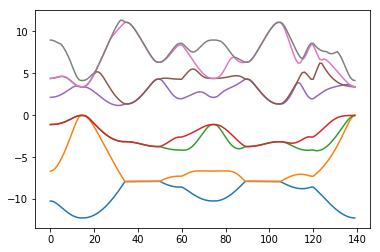

In [5]:
h.set_periodic_bc(primitive_cell=params['primitive_cell'])

sym_points = ['L', 'GAMMA', 'X', 'W', 'K', 'L', 'W', 'X', 'K', 'GAMMA']
num_points = [15, 20, 15, 10, 15, 15, 15, 15, 20]
kk = tb.get_k_coords(sym_points, num_points)

band_sructure = []
num_of_bands = 8

for j, jj in enumerate(kk):
    vals, _ = h.diagonalize_periodic_bc(list(jj))
    vals = np.sort(np.real(vals))[:num_of_bands]
    band_sructure.append(vals)
#     print('#{} '.format(j), len(vals) * '{:2f} '.format(*np.real(vals)))

band_sructure = np.array(band_sructure)

ax = plt.axes()
ax.plot(np.sort(np.real(band_sructure)))
plt.show()